In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(5)

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [5]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi', 'age']]
y = df_target

**Separación de los datos en entrenamiento y prueba**

In [6]:
# Separar los datos en muestras de entrenamiento y de prueba
X_train_np, X_test_np, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Preprocesamiento para una regresión polinomial**

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the input data to include polynomial terms up to degree 2
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train_np)
X_test = poly.fit_transform(X_test_np)

**Entrenamiento del modelo**

In [8]:
# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

**Evaluación del modelo**

In [9]:

# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 4035.18
r2: 0.21


**Análisis de los coeficientes**

In [10]:
coefficients = modelo_regresion_simple.coef_[0]
print('coeficientes:', coefficients)

z_intercept = modelo_regresion_simple.intercept_
print('coeficientes:', z_intercept)

coeficientes: [   0.          979.70369145  138.75455026  300.29676792 2184.12682698
 1992.84224859]
coeficientes: [145.71647944]


In [11]:
X_train

array([[ 1.00000000e+00,  2.41654246e-03,  1.26481373e-02,
         5.83967744e-06,  3.05647607e-05,  1.59975377e-04],
       [ 1.00000000e+00, -7.73415510e-02, -1.07225632e-01,
         5.98171551e-03,  8.29299666e-03,  1.14973361e-02],
       [ 1.00000000e+00, -3.53068801e-02,  2.71782911e-02,
         1.24657578e-03, -9.59580665e-04,  7.38659506e-04],
       ...,
       [ 1.00000000e+00, -2.12953232e-02,  5.98711371e-02,
         4.53490789e-04, -1.27497521e-03,  3.58455306e-03],
       [ 1.00000000e+00, -7.30303027e-02, -7.81653240e-02,
         5.33342511e-03,  5.70843727e-03,  6.10981788e-03],
       [ 1.00000000e+00,  7.13965152e-02,  4.17084449e-02,
         5.09746238e-03,  2.97783762e-03,  1.73959437e-03]])

**Gráfico de los datos y la función de regresión**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the 3D scatter plot
fig = plt.figure(dpi = 500, figsize = (16,9))
ax = fig.add_subplot(111, projection='3d')

#Plot the scatter plot
ax.scatter( X_train_np['bmi'], X_train_np['age'], y_train)
ax.scatter( X_test_np['bmi'], X_test_np['age'], y_pred, c = 'black', marker = 'x')

# Define the function to plot over the scatter plot
def f(X, Y, z_intercept, coef):
    return  coef[1]*X + coef[2]*Y + coef[3]*X**2 + coef[4]*X*Y + coef[5]*Y**2 + z_intercept

#Generate a contour plot with the predictions

# Create a grid of coordinates
x1 = np.linspace(-0.15, 0.15, 10)
x2 = np.linspace(-0.15, 0.15, 10)
xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.column_stack((xx1.ravel(), xx2.ravel()))

# Transform the grid of coordinates to include polynomial terms up to degree 2
X_grid_poly = poly.fit_transform(X_grid)

# Make predictions using the polynomial regression model
y_grid = modelo_regresion_simple.predict(X_grid_poly)

# Reshape the predictions to match the grid of coordinates
y_grid = y_grid.reshape(xx1.shape)

# Generate the data to plot the function
x = np.linspace(-0.15, 0.15, 50)
y = np.linspace(-0.15, 0.15, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, z_intercept, coefficients)

# Plot the function over the scatter plot
surf = ax.plot_surface(X, Y, Z, alpha=0.8)
# surf = ax.plot_surface(xx1, xx2, y_grid, cmap='Blues', alpha = 0.8)

# Set the labels and title for the plot
ax.set_xlabel('BMI')
ax.set_ylabel('S2')
ax.set_zlabel('Disease Progression')
ax.set_title('Linear Regression Model Prediction')

# Set the initial view
# ax.view_init(elev= 0, azim= 120)

# Show the plot
plt.show()

**Regresión Lineal utilizando métodos estadísticos**

In [ ]:
import statsmodels.api as sm

X = df[['bmi']]
y = df_target

X = sm.add_constant(X) # añadir constante para calcular intercepto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 22 May 2023   Prob (F-statistic):           8.70e-38
Time:                        14:39:47   Log-Likelihood:                -1957.0
No. Observations:                 353   AIC:                             3918.
Df Residuals:                     351   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2882      3.303     46.111      0.0

In [ ]:
print('Parameters: \n', model.params)
print('\nStandard errors: \n', model.bse)
print('\nTrust Interval: \n', model.conf_int())

Parameters: 
 const    152.288249
bmi      981.655436
dtype: float64

Standard errors: 
 const     3.302676
bmi      67.553156
dtype: float64

Trust Interval: 
                 0            1
const  145.792726   158.783773
bmi    848.795566  1114.515306


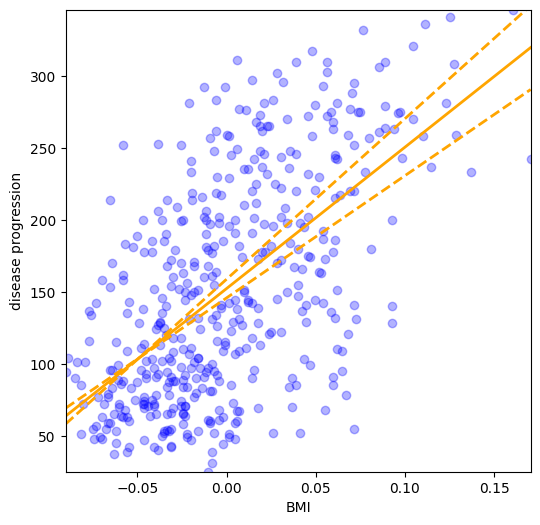

In [ ]:
z = np.linspace(X.min(), X.max(), 100)
m = model.params.bmi
b = model.params.const

## Intervalo de confianza
conf_int = model.conf_int()

m_low = conf_int[0]['bmi']
m_up = conf_int[1]['bmi']
b_low = conf_int[0]['const']
b_up = conf_int[1]['const']

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X['bmi'], y['target'], 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='-', color='orange', lw=2)
ax.plot(z, m_low*z + b_low, ls='--', color='orange', lw=2)
ax.plot(z, m_up*z + b_up, ls='--', color='orange', lw=2)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
ax.set_xlim(X['bmi'].min(), X['bmi'].max())
ax.set_ylim(y['target'].min(), y['target'].max())
plt.show()

In [ ]:
df = df.join(df_target)

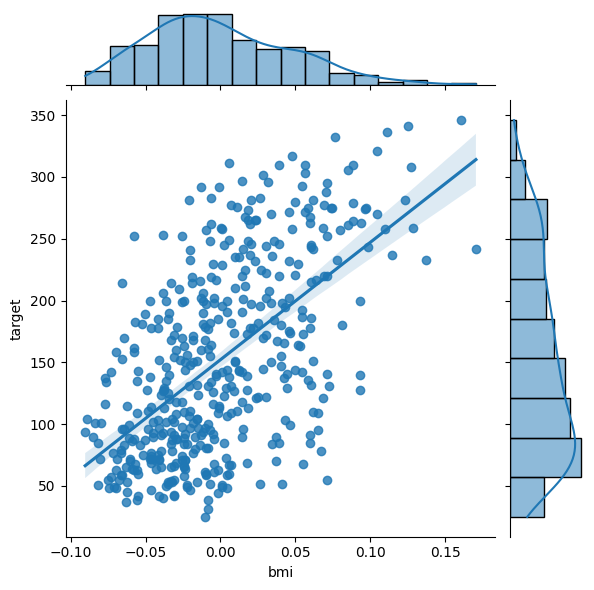

In [ ]:
import seaborn as sns

sns.jointplot(data = df, x = df['bmi'], y = df['target'], kind = 'reg')

In [ ]:
X_men = df[df['age' == 0.050680]]

KeyError: False

# Regresión Logística

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


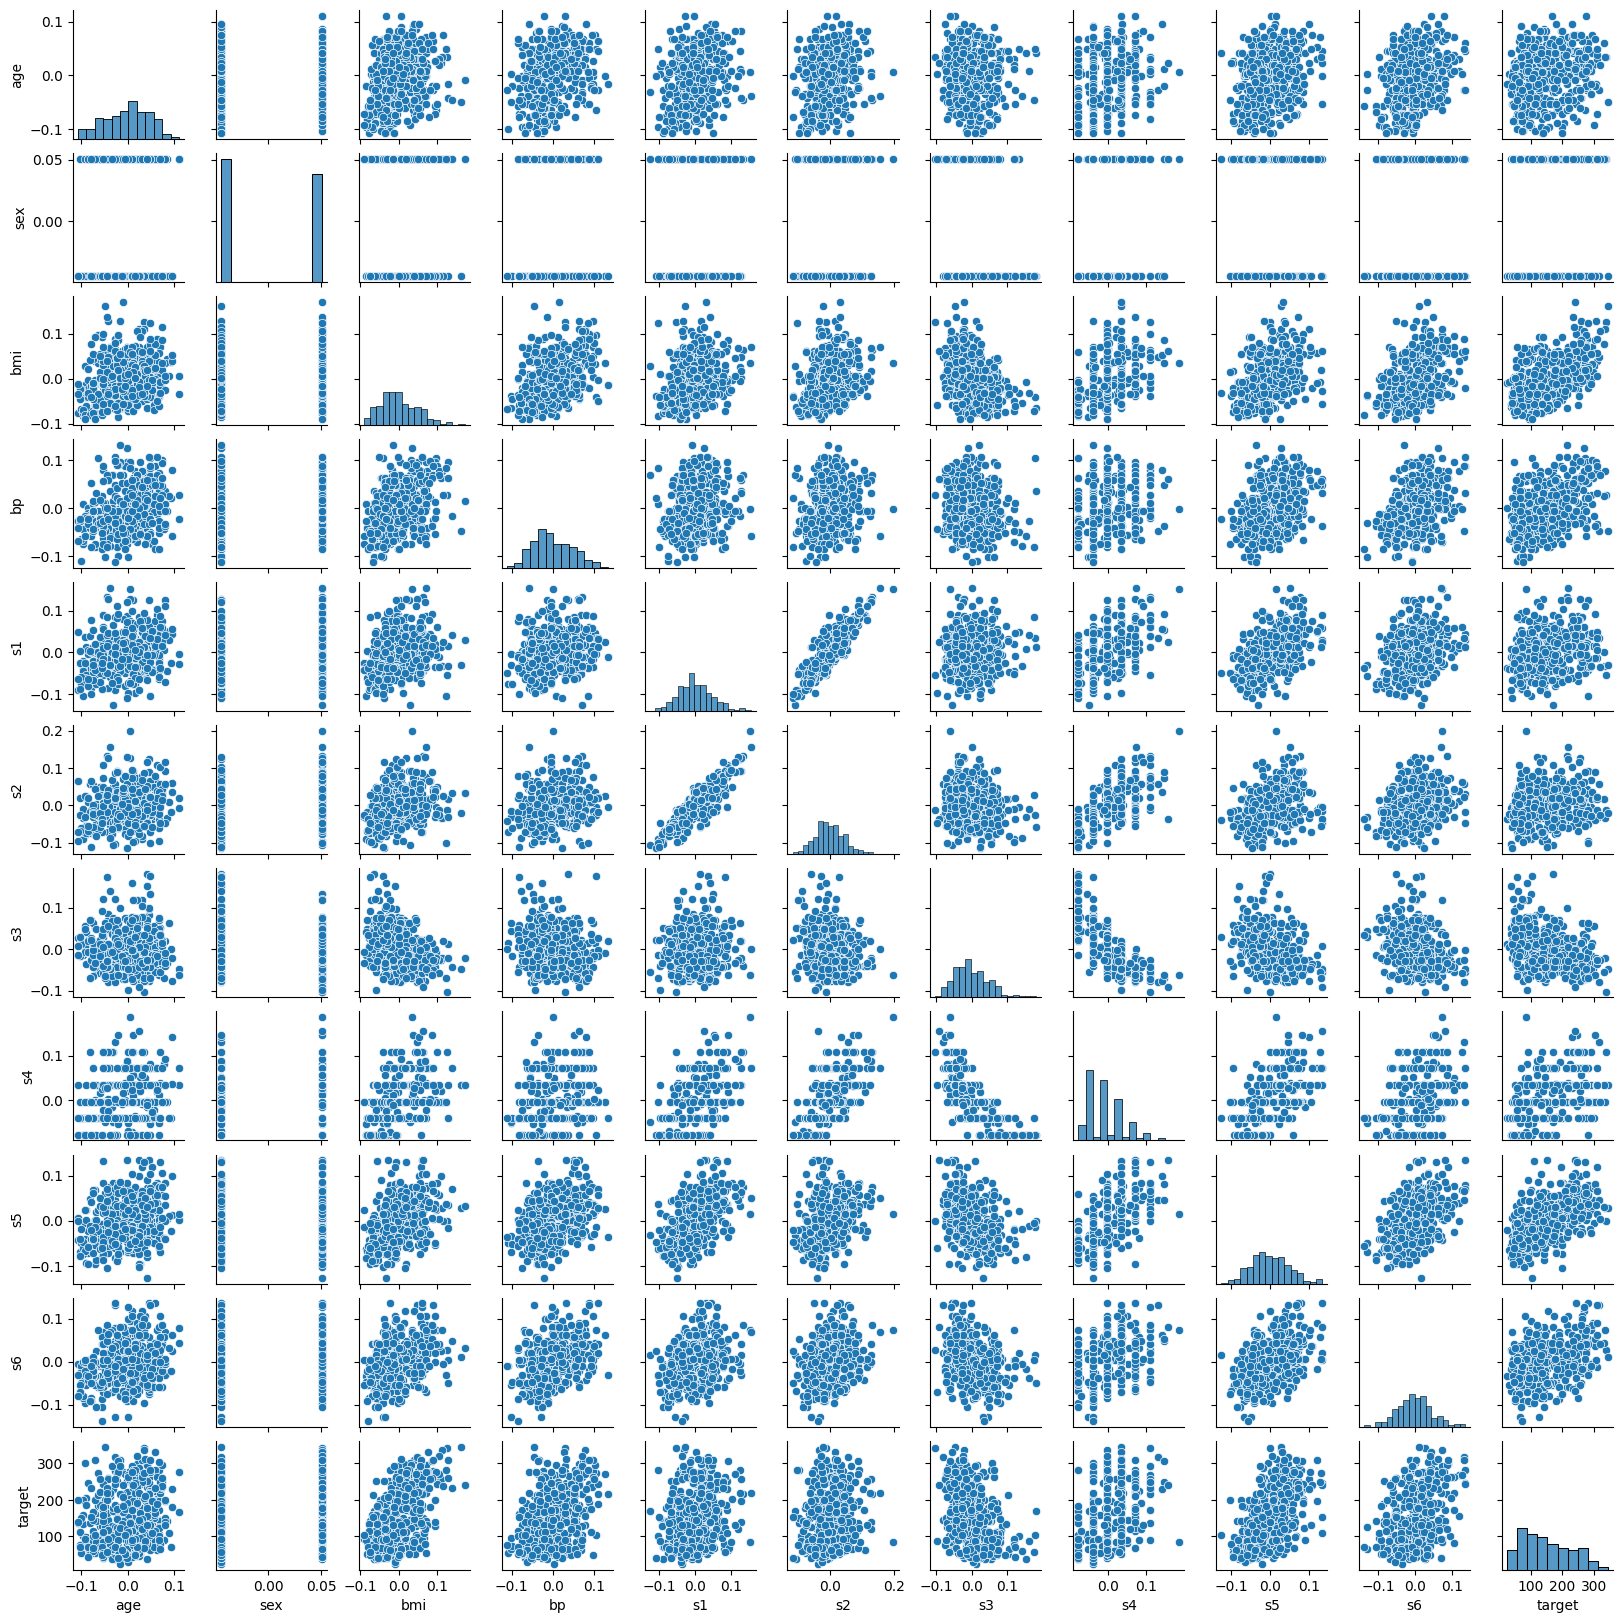

In [ ]:
sns.pairplot(df, height=1.5)

Text(0.5, 1.0, 's4')

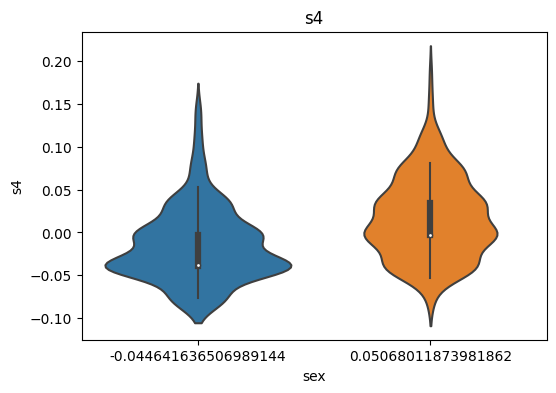

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x = 'sex', y = 's4', data = df, ax = ax)
ax.set_title('s4')

In [ ]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['age', 's3', 's4', 'bmi', 'bp']] #df.drop(columns=['sex'])
y = df[['sex']]

In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(np.ravel(y)) # 1D array

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
y = le.fit_transform(np.ravel(df[['sex']]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [ ]:
reg_log.predict_proba(X_test)

array([[0.47584628, 0.52415372],
       [0.47894937, 0.52105063],
       [0.47991104, 0.52008896],
       [0.53046063, 0.46953937],
       [0.54461766, 0.45538234],
       [0.51123327, 0.48876673],
       [0.56123859, 0.43876141],
       [0.48525472, 0.51474528],
       [0.54639979, 0.45360021],
       [0.52072785, 0.47927215],
       [0.50490963, 0.49509037],
       [0.45820446, 0.54179554],
       [0.53451826, 0.46548174],
       [0.56788326, 0.43211674],
       [0.42468902, 0.57531098],
       [0.56306451, 0.43693549],
       [0.53882023, 0.46117977],
       [0.58612942, 0.41387058],
       [0.56754561, 0.43245439],
       [0.45806931, 0.54193069],
       [0.49518754, 0.50481246],
       [0.57228139, 0.42771861],
       [0.48369072, 0.51630928],
       [0.57192159, 0.42807841],
       [0.49402014, 0.50597986],
       [0.54024371, 0.45975629],
       [0.59857528, 0.40142472],
       [0.60709622, 0.39290378],
       [0.54952735, 0.45047265],
       [0.49685515, 0.50314485],
       [0.

In [ ]:
print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[ 0.80155775 -1.9970411   1.68640393  0.24765855  1.3252932 ]]
intercept:  [-0.08363432]
score:  0.6855203619909502


In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.595014
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  309
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.1405
Time:                        14:40:13   Log-Likelihood:                -183.86
converged:                       True   LL-Null:                       -213.91
Covariance Type:            nonrobust   LLR p-value:                 1.160e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1115      0.126     -0.882      0.378      -0.359       0.136
age            2.7786      2.

In [ ]:
intervalos_conf = reg_log.conf_int(alpha=0.05)
intervalos_conf

,0,1
const,-0.359211,0.136302
age,-2.762640,8.319917
s3,-25.374442,-7.574339
s4,-5.725389,11.093934
bmi,-13.668417,-1.352042
bp,3.655396,16.077026


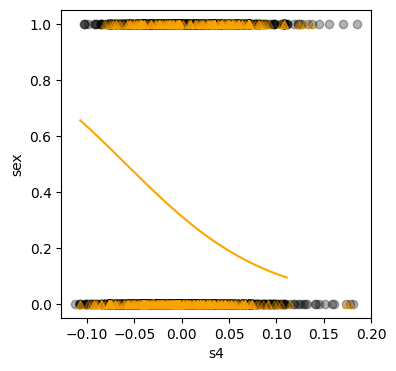

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('s4')
ax.set_ylabel('sex')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()

**Evaluación del desempeño del modelo**

In [ ]:
def accuracy(TP, TN, FP, FN):
    a = (TP + TN) / (TP + TN + FP + FN)
    return a * 100

def sensibilidad(TP, TN, FP, FN):
    s = TP / (TP + FN)
    return s * 100

def especificidad(TP, TN, FP, FN):
    e = TN / (TN + FP)
    return e * 100

def evaluar_modelo(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = matrix.ravel()

    print(f"Exactitud: {accuracy(TP, TN, FP, FN)}")
    print(f"Sensibilidad: {sensibilidad(TP, TN, FP, FN)}")
    print(f"Especificidad: {especificidad(TP, TN, FP, FN)}")

In [ ]:
m = confusion_matrix(y_test, y_pred)
m

array([[61, 13],
       [23, 36]], dtype=int64)

In [ ]:
(TN, FP, FN, TP) = m.ravel()
(TN, FP, FN, TP)

(61, 13, 23, 36)

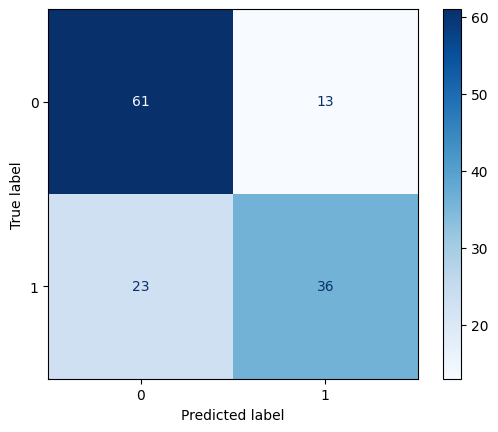

In [ ]:
ConfusionMatrixDisplay(m).plot(cmap=plt.cm.Blues);

In [ ]:
evaluar_modelo(y_test, y_pred)

Exactitud: 72.93233082706767
Sensibilidad: 61.016949152542374
Especificidad: 82.43243243243244


### Árboles de Decisión

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn import preprocessing

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.ravel(df[['sex']]))
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [ ]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

Score:  0.5864661654135338


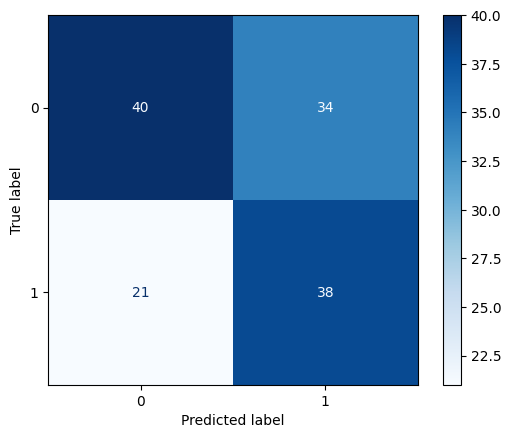

In [ ]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

In [ ]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.ravel(df[['sex']]))
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [ ]:
# n_estimators = numero de arboles independientes (100 default)
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Score:  0.631578947368421


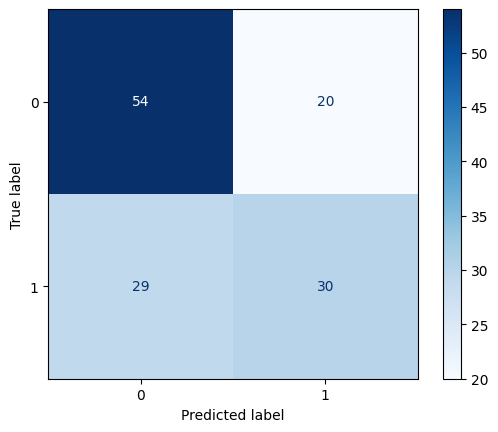

In [ ]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

In [ ]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10)

forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

In [ ]:
print('Score: ', forest_reg.score(X_test, y_test))

Score:  0.24145038564928234


### Ejercicio: 
Usar el dataset precargado de sklearn de cáncer de mama (load_breast_cancer) y construir un modelo que prediga si hay cancer o no utilizando árboles de decisión.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
df['target'] = cancer_mama.target

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

**Usando RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators = 10)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Score:  0.9415204678362573


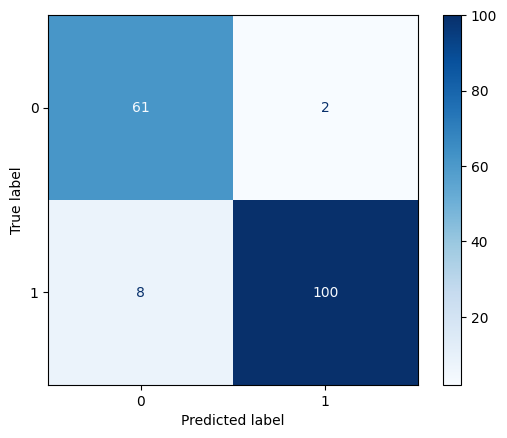

In [ ]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap = plt.cm.Blues);

**Usando DecisionTreeClassifier**

In [ ]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

Score:  0.9239766081871345


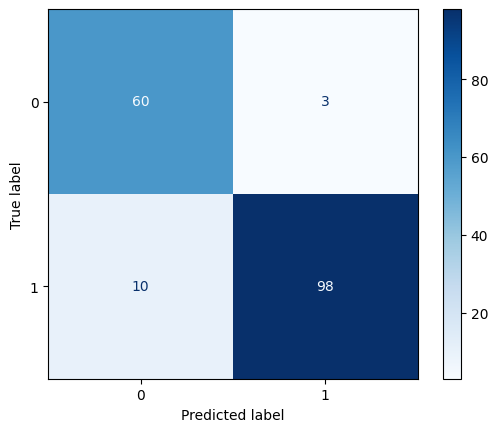

In [ ]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

### Máquinas de Soporte Vectorial

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC, SVR

### Clasificación

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn import preprocessing

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
le = preprocessing.LabelEncoder()

y = le.fit_transform(np.ravel(df[['sex']]))
X = df.drop(columns=['sex']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

Score:  0.518796992481203


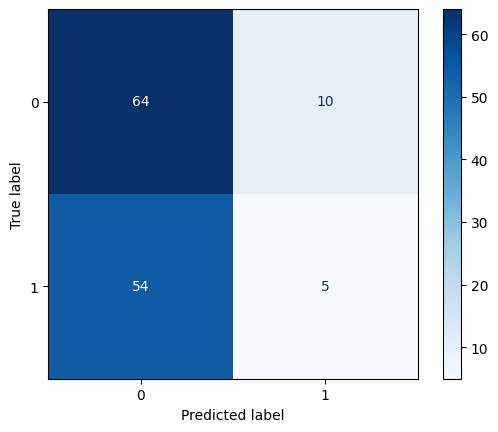

In [ ]:
svc = SVC(kernel = 'poly') #Support Vector Classification
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
accuracy = svc.score(X_test, y_test)
print('Score: ', svc.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

### Regresión

In [ ]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [ ]:
svc2 = SVR() #Support Vector Regression
svc2.fit(X_train, y_train)
y_pred = svc2.predict(X_test)

print('Score: ', svc2.score(X_test, y_test))

Score:  0.13698853003535139


# Redes Neuronales Artificiales (ANN)

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
df['target'] = cancer_mama.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
X = df.drop(columns=['target']) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [10]:
# input_shape solo para la primera

capa0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation = 'relu') 
capa1 = tf.keras.layers.Dense(units=32, activation = 'relu')
capa2 = tf.keras.layers.Dense(units=16, activation = 'relu')
capa3 = tf.keras.layers.Dense(units=1, activation = 'sigmoid')

modelo = tf.keras.Sequential([capa0, capa1, capa2, capa3])

In [11]:
modelo.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['accuracy'])

entrenamiento = modelo.fit(X_train, y_train, epochs = 300, batch_size=32, verbose = True, validation_split=0.1)

evaluacion_modelo = modelo.evaluate(X_test, y_test)
print('Score:', evaluacion_modelo[1])

Epoch 1/300
12/12 [==============================] - 4s 74ms/step - loss: 69.8624 - accuracy: 0.4832 - val_loss: 0.6782 - val_accuracy: 0.6500
Epoch 2/300
12/12 [==============================] - 0s 16ms/step - loss: 0.6718 - accuracy: 0.6229 - val_loss: 0.6490 - val_accuracy: 0.6500
Epoch 3/300
12/12 [==============================] - 0s 15ms/step - loss: 0.6663 - accuracy: 0.6229 - val_loss: 0.6475 - val_accuracy: 0.6500
Epoch 4/300
12/12 [==============================] - 0s 16ms/step - loss: 0.6634 - accuracy: 0.6229 - val_loss: 0.6483 - val_accuracy: 0.6500
Epoch 5/300
12/12 [==============================] - 0s 16ms/step - loss: 0.6629 - accuracy: 0.6229 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 6/300
12/12 [==============================] - 0s 13ms/step - loss: 0.6628 - accuracy: 0.6229 - val_loss: 0.6492 - val_accuracy: 0.6500
Epoch 7/300
12/12 [==============================] - 0s 12ms/step - loss: 0.6633 - accuracy: 0.6229 - val_loss: 0.6494 - val_accuracy: 0.6500
Epoch

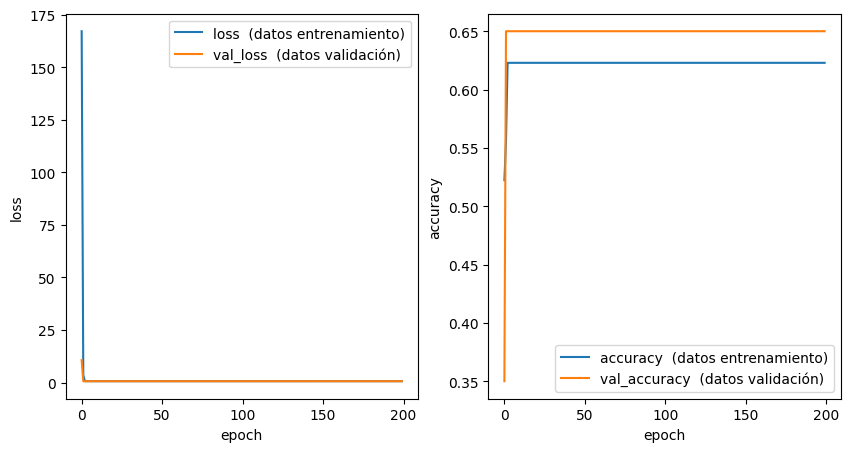

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(entrenamiento.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(entrenamiento.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(entrenamiento.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(entrenamiento.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

---
### Ejercicio del Dataset Diabetes con una ANN

In [112]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = np.array(df['bmi'])
y_orig = np.array(df['target'])

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y = scaler.fit_transform(y_orig.reshape(-1,1))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

In [116]:
l0 = tf.keras.layers.Dense(units = 64, input_shape = [1], activation = 'selu')
l1 = tf.keras.layers.Dense(units = 128, activation = 'selu')
l2 = tf.keras.layers.Dense(units=1)
redN_regLineal = tf.keras.Sequential([l0, l1, l2])
redN_regLineal.compile(loss="mean_squared_error", optimizer="adam", metrics = ['accuracy'])
redN_regLineal_hist = redN_regLineal.fit(X_train, y_train, epochs=100, verbose = True, validation_split=0.1)

Epoch 1/100
10/10 [==============================] - 2s 33ms/step - loss: 0.1025 - accuracy: 0.0032 - val_loss: 0.0520 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0464 - accuracy: 0.0063 - val_loss: 0.0447 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0383 - accuracy: 0.0063 - val_loss: 0.0496 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.0063 - val_loss: 0.0465 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.0063 - val_loss: 0.0470 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.0063 - val_loss: 0.0470 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0360 - accuracy: 0.0063 - val_loss: 0.0460 - val_ac

In [117]:
from sklearn.metrics import r2_score

y_pred = redN_regLineal.predict(X_test)
r2_score(y_test, y_pred)

3/3 [==============================] - 0s 0s/step


0.19426413397789355

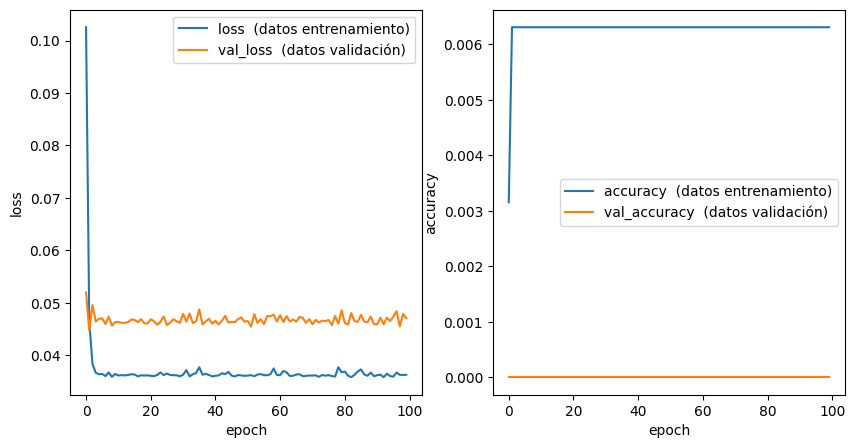

In [118]:

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(redN_regLineal_hist.history["loss"], label="loss  (datos entrenamiento)")
ax[0].plot(redN_regLineal_hist.history["val_loss"], label="val_loss  (datos validación)")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(redN_regLineal_hist.history["accuracy"], label="accuracy  (datos entrenamiento)")
ax[1].plot(redN_regLineal_hist.history["val_accuracy"], label="val_accuracy  (datos validación)")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend();

ValueError: x and y must have same first dimension, but have shapes (100,) and (128, 100)

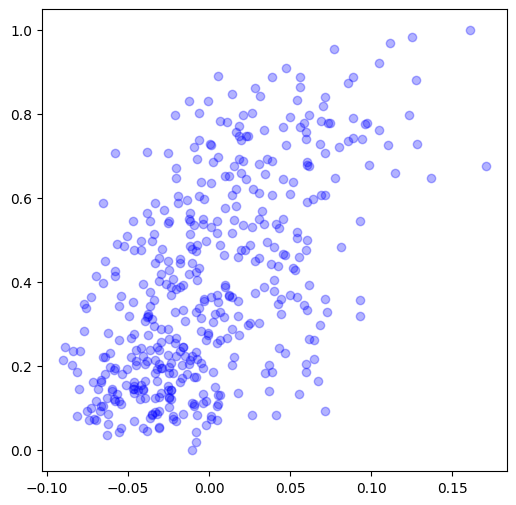

In [122]:
z = np.linspace(X.min(), X.max(), 100)
m, b =l2.get_weights() 

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X, y, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()

**Procesamiento de Imágenes**